In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
root = '/content/drive/MyDrive/TFG/animal-detection/YoloNAS/'

datasets = ['sheeps_own', 'aerial_sheep', 'aerial_sheep_2', 'UAV_sheep']

files = {'sheeps_own': '/experiment_logs_Jul03_18_43_59.txt',
         'aerial_sheep':'/experiment_logs_Jul02_10_36_33.txt',
         'aerial_sheep_2':'/experiment_logs_Jul02_15_19_12.txt',
         'UAV_sheep': '/experiment_logs_Jul05_10_02_09.txt'}

titles = ['train/cls_loss', 'train/iou_loss', 'train/dfl_loss', 'train/loss', 'valid/cls_loss', 'valid/iou_loss',
        'valid/dfl_loss', 'valid/loss', 'precision', 'recall', 'mAP', 'F1', 'inference_time']

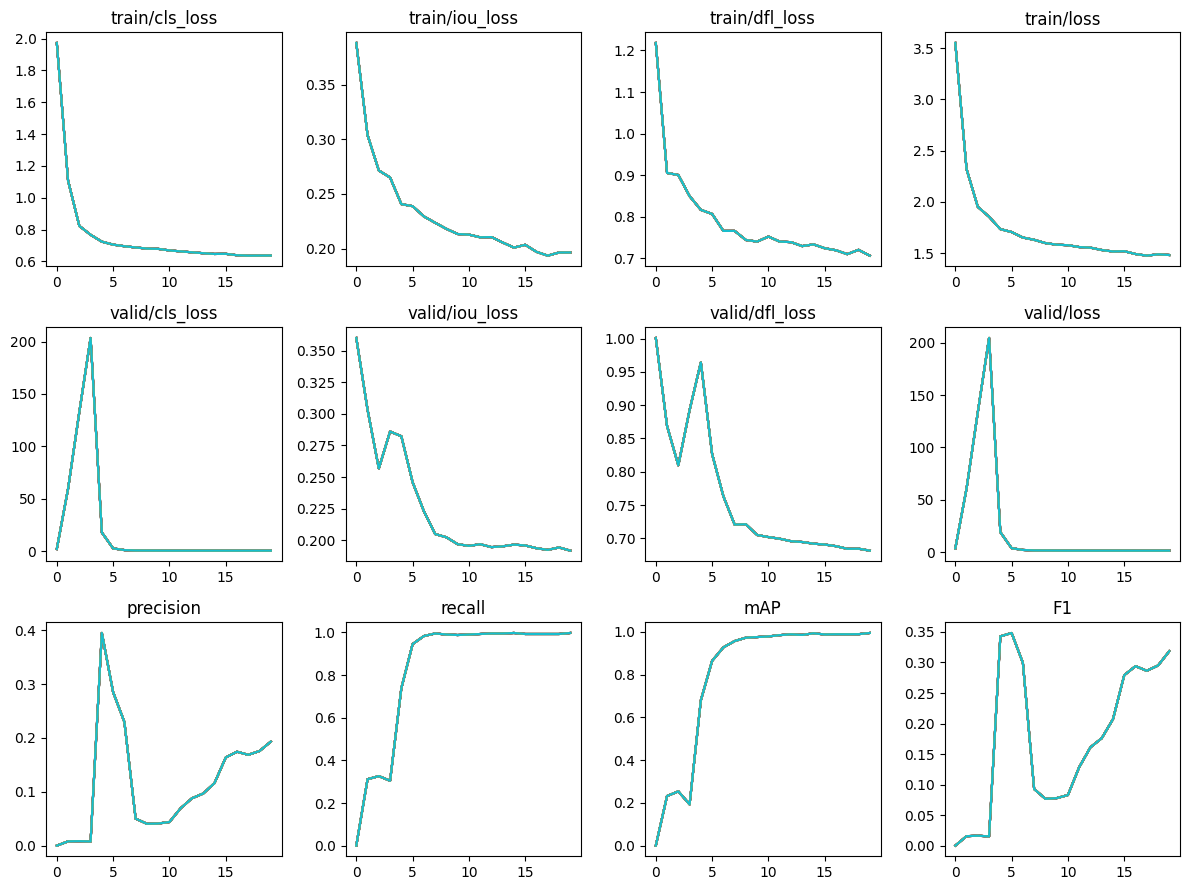

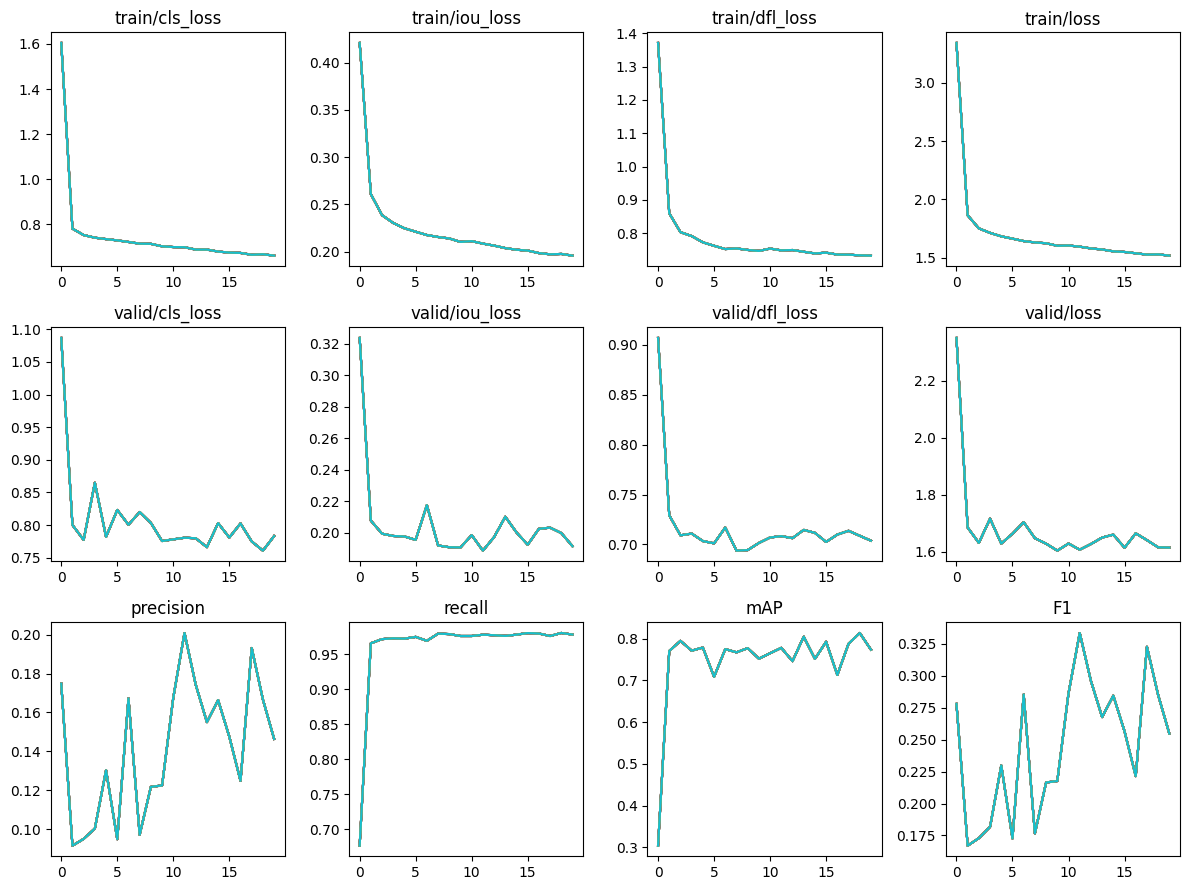

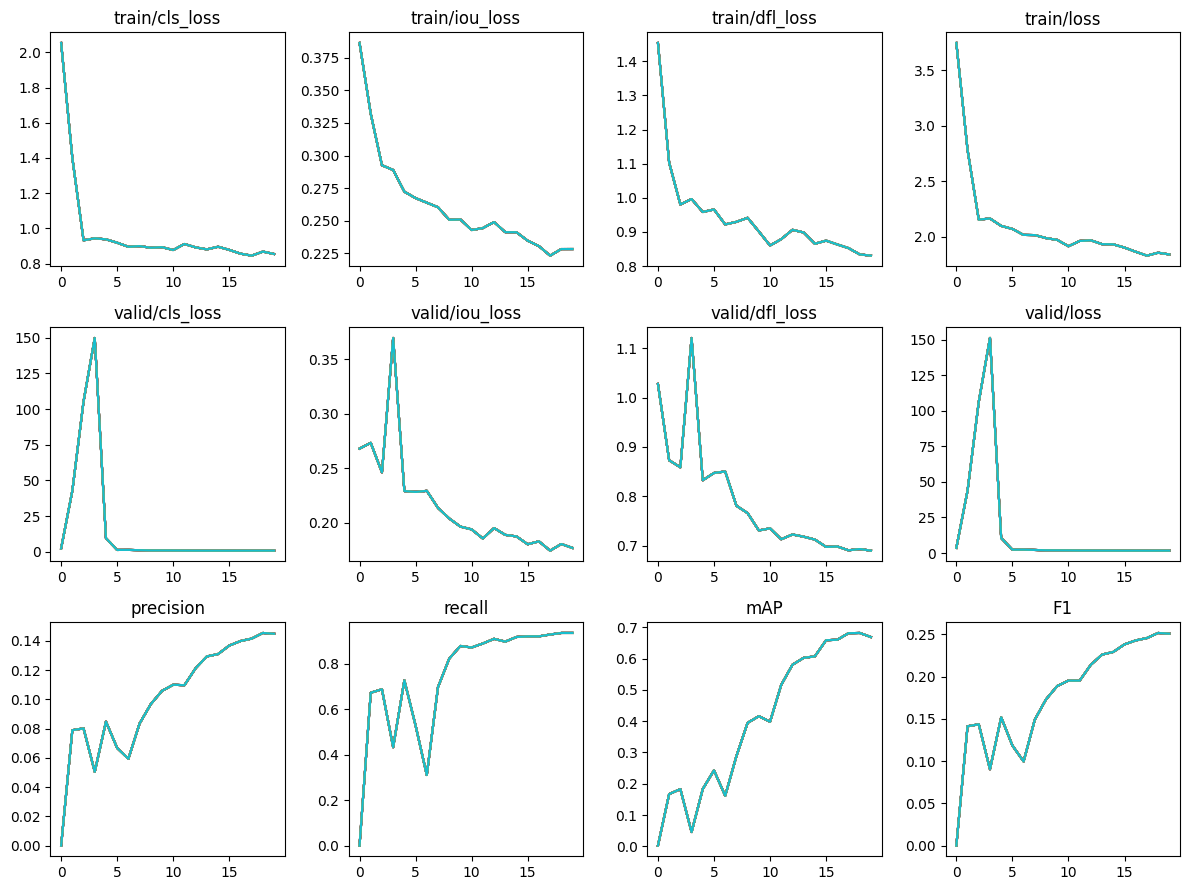

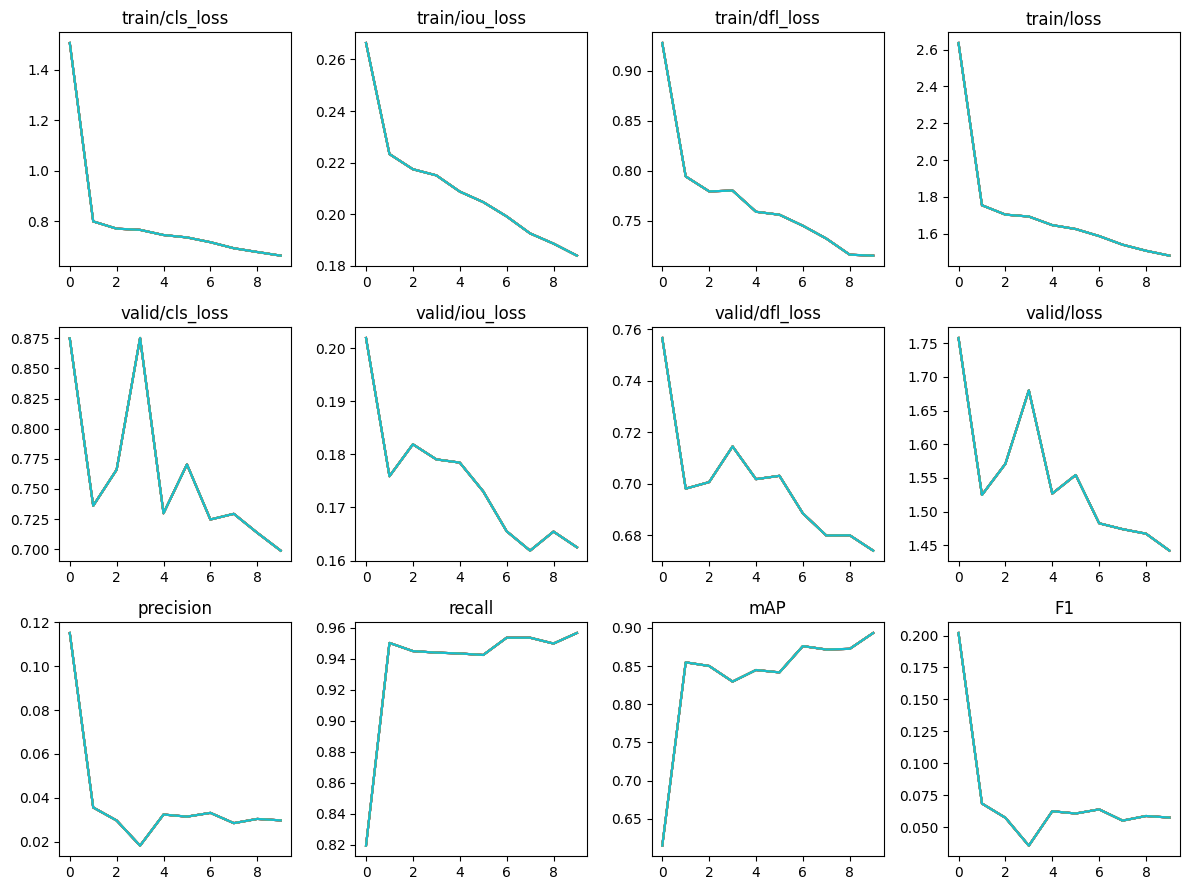

In [7]:
import matplotlib.pyplot as plt

for dataset in datasets:

    epochs = []

    data = []
    train_loss_cls = []
    train_loss_iou = []
    train_loss_dfl = []
    train_loss = []
    valid_loss_cls = []
    valid_loss_iou = []
    valid_loss_dfl = []
    valid_loss = []
    valid_precision = []
    valid_recall = []
    valid_map = []
    valid_f1 = []
    inference_time = []


    path = root + dataset + files[dataset]

    with open(path, 'r') as file:
        for line in file:
            if line.strip() == "------- config parameters end --------":
                break

        for line in file:
            values = line.split()
            if(len(values) > 8):
                epoch = []

                for i, value in enumerate(values):
                    if(i > 3 and i%2 == 1):
                        epoch.append(float(value))

                epochs.append(epoch)

        for epoch in epochs:
            train_loss_cls.append(epoch[0])
            train_loss_iou.append(epoch[1])
            train_loss_dfl.append(epoch[2])
            train_loss.append(epoch[3])
            valid_loss_cls.append(epoch[4])
            valid_loss_iou.append(epoch[5])
            valid_loss_dfl.append(epoch[6])
            valid_loss.append(epoch[7])
            valid_precision.append(epoch[8])
            valid_recall.append(epoch[9])
            valid_map.append(epoch[10])
            valid_f1.append(epoch[11])
            inference_time.append(epoch[12])


    data.append(train_loss_cls)
    data.append(train_loss_iou)
    data.append(train_loss_dfl)
    data.append(train_loss)
    data.append(valid_loss_cls)
    data.append(valid_loss_iou)
    data.append(valid_loss_dfl)
    data.append(valid_loss)
    data.append(valid_precision)
    data.append(valid_recall)
    data.append(valid_map)
    data.append(valid_f1)
    data.append(inference_time)

    fig, axs = plt.subplots(3, 4, figsize=(12, 9))
    for epoch in epochs:

        for i, ax in enumerate(axs.flat):
            ax.plot(data[i])
            ax.set_title(titles[i])

        fig.tight_layout()
        plt.savefig(root + dataset +"/results.png")